In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from dynamic_disagreeing_neighbors.visualization.plots import plot_sota_score_differences, plot_sota_observed_vs_predicted, plot_sota_residuals_comparison
from dynamic_disagreeing_neighbors.data.tidy_data import prepare_data
from dynamic_disagreeing_neighbors.results.statistical_analysis import calculate_grouped_statistics, print_summary_statistics
from dynamic_disagreeing_neighbors.utils import compute_residuals, train_and_evaluate_model
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_score_differences = pd.read_parquet('data/results/score_differences_data.parquet')
df_sota_score_differences = pd.read_parquet('data/results/score_differences_sota_data.parquet')
df_performance_results = pd.read_parquet('data/results/performance_data_agnostic.parquet')
df_description = pd.read_parquet('data/results/df_description_data.parquet')

In [4]:
mask_acc = ((df_score_differences['metric_x'] == 'accuracy_score') & (((df_score_differences['metric_y'] == 'kdn') & (df_score_differences['k'] == 1)) | 
                                                                      ((df_score_differences['metric_y'] == 'ddn') & (df_score_differences['k'] == 1))))
mask_f1 = ((df_score_differences['metric_x'] == 'f1_score') & (((df_score_differences['metric_y'] == 'kdn') & (df_score_differences['k'] == 7)) | 
                                                                      ((df_score_differences['metric_y'] == 'ddn') & (df_score_differences['k'] == 1))))
mask_gps = ((df_score_differences['metric_x'] == 'gps_score') & (((df_score_differences['metric_y'] == 'kdn') & (df_score_differences['k'] == 7)) | 
                                                                      ((df_score_differences['metric_y'] == 'ddn') & (df_score_differences['k'] == 1))))
mask_mcc = ((df_score_differences['metric_x'] == 'scaled_mcc_score') & (((df_score_differences['metric_y'] == 'kdn') & (df_score_differences['k'] == 3)) | 
                                                                      ((df_score_differences['metric_y'] == 'ddn') & (df_score_differences['k'] == 1))))


df_score_differences_best_complexity = df_score_differences[mask_acc+mask_f1+mask_gps+mask_mcc]

In [5]:
df_score_differences_complexity = pd.concat([df_score_differences_best_complexity.drop(columns=['k']), df_sota_score_differences], ignore_index=True)

In [6]:
df_score_differences_complexity

,dataset,metric_x,score,score_sd,metric_y,dataset_complexity,minority_class_complexity,most_complex_class,diff_score_minority_class_complexity,diff_score_most_complex_class,diff_score_dataset
0,a9a,accuracy_score,0.850035,0.003225,kdn,0.188784,0.375717,0.375717,0.225753,0.225753,0.038820
1,a9a,accuracy_score,0.850035,0.003225,ddn,0.212416,0.423633,0.423633,0.273669,0.273669,0.062451
2,appendicitis,accuracy_score,0.887013,0.056549,kdn,0.188679,0.380952,0.380952,0.267965,0.267965,0.075692
3,appendicitis,accuracy_score,0.887013,0.056549,ddn,0.188679,0.380952,0.380952,0.267965,0.267965,0.075692
4,australian,accuracy_score,0.875362,0.037345,kdn,0.201449,0.234528,0.234528,0.109890,0.109890,0.076812
...,...,...,...,...,...,...,...,...,...,...,...
1555,vehicle2,gps_score,0.987547,0.007920,CLD,0.257094,0.490807,0.490807,0.478354,0.478354,0.244641
1556,vehicle2,scaled_mcc_score,0.987671,0.007849,N1,0.034732,0.057875,0.057875,0.045545,0.045545,0.022403
1557,vehicle2,scaled_mcc_score,0.987671,0.007849,N2,0.336318,0.352557,0.352557,0.340228,0.340228,0.323989
1558,vehicle2,scaled_mcc_score,0.987671,0.007849,F1,0.927436,0.970948,0.970948,0.958619,0.958619,0.915107


In [7]:
df_merged = prepare_data(df_description, df_score_differences_complexity, df_performance_results, None)

In [8]:
df_merged

,dataset,metric_x,score,score_sd,metric_y,dataset_complexity,minority_class_complexity,most_complex_class,diff_score_minority_class_complexity,diff_score_most_complex_class,diff_score_dataset,class_prop_category,class_prop,minority_class_complexity_category,most_complex_class_category
0,a9a,accuracy_score,0.850035,0.003225,kdn,0.188784,0.375717,0.375717,0.225753,0.225753,0.038820,0.2-0.3,0.241,0.3-0.4,0.3-0.4
1,a9a,accuracy_score,0.850035,0.003225,ddn,0.212416,0.423633,0.423633,0.273669,0.273669,0.062451,0.2-0.3,0.241,0.4-0.5,0.4-0.5
2,a9a,f1_score,0.665137,0.006420,ddn,0.212416,0.423633,0.423633,0.088771,0.088771,-0.122447,0.2-0.3,0.241,0.4-0.5,0.4-0.5
3,a9a,f1_score,0.665137,0.006420,kdn,0.213959,0.420701,0.420701,0.085838,0.085838,-0.120904,0.2-0.3,0.241,0.4-0.5,0.4-0.5
4,a9a,gps_score,0.766147,0.005106,ddn,0.212416,0.423633,0.423633,0.189780,0.189780,-0.021437,0.2-0.3,0.241,0.4-0.5,0.4-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,vehicle2,gps_score,0.987547,0.007920,CLD,0.257094,0.490807,0.490807,0.478354,0.478354,0.244641,0.2-0.3,0.258,0.4-0.5,0.4-0.5
1556,vehicle2,scaled_mcc_score,0.987671,0.007849,N1,0.034732,0.057875,0.057875,0.045545,0.045545,0.022403,0.2-0.3,0.258,0-0.1,0-0.1
1557,vehicle2,scaled_mcc_score,0.987671,0.007849,N2,0.336318,0.352557,0.352557,0.340228,0.340228,0.323989,0.2-0.3,0.258,0.3-0.4,0.3-0.4
1558,vehicle2,scaled_mcc_score,0.987671,0.007849,F1,0.927436,0.970948,0.970948,0.958619,0.958619,0.915107,0.2-0.3,0.258,0.4-0.5,0.4-0.5


--- Plotting for Performance Metric: accuracy_score ---


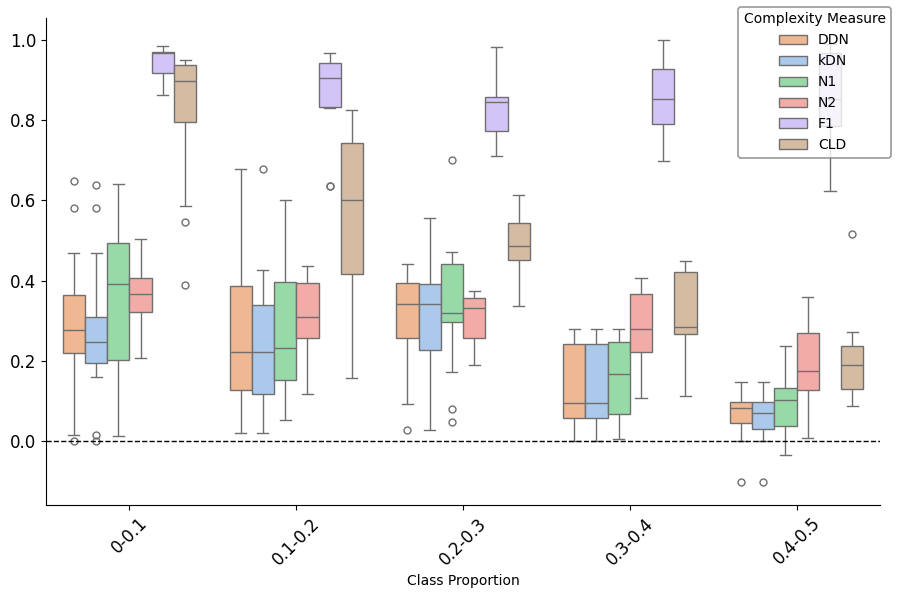

--- Plotting for Performance Metric: f1_score ---


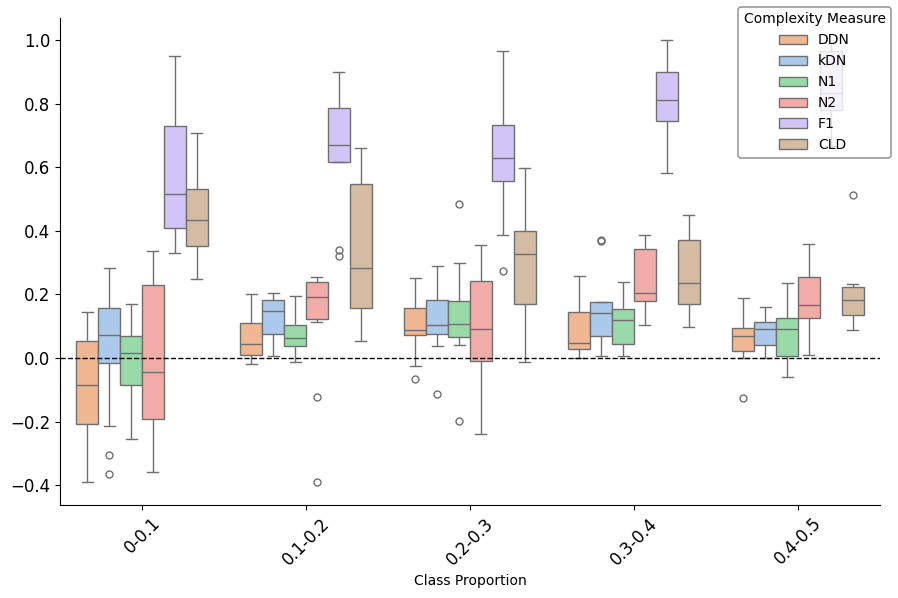

--- Plotting for Performance Metric: gps_score ---


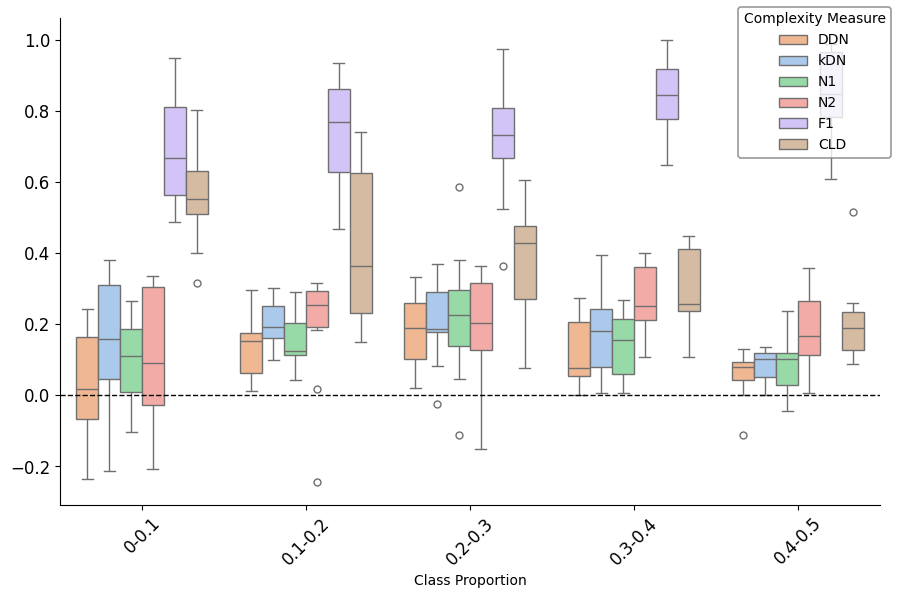

--- Plotting for Performance Metric: scaled_mcc_score ---


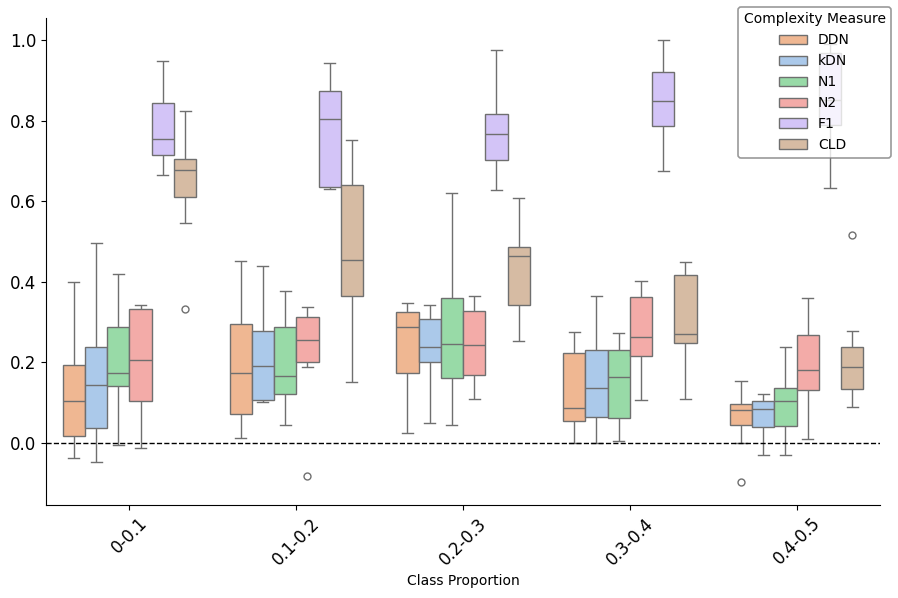

In [9]:
plot_sota_score_differences(df_merged, diff_col='diff_score_minority_class_complexity', x_var='class_prop_category', y_title='')

--- Plotting for Performance Metric: accuracy_score ---


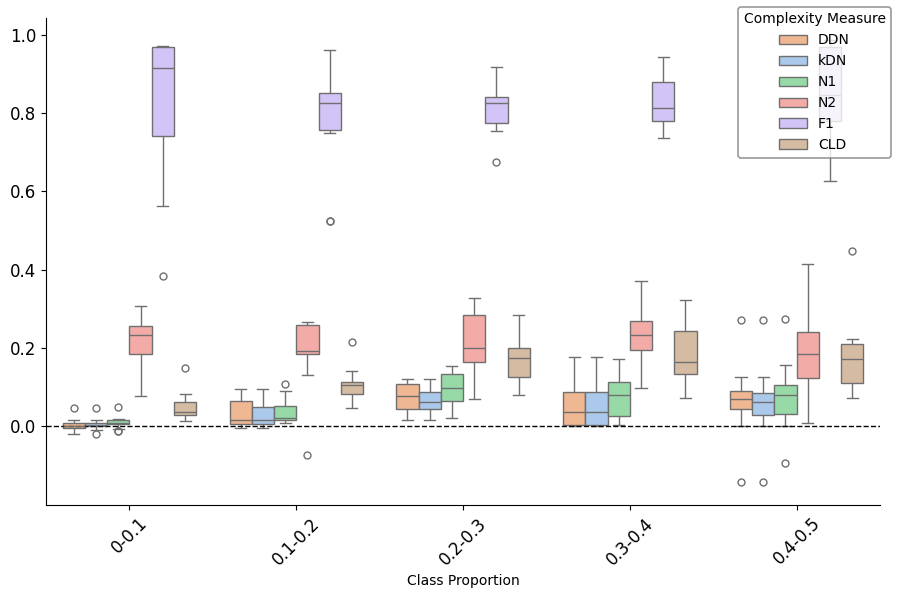

--- Plotting for Performance Metric: f1_score ---


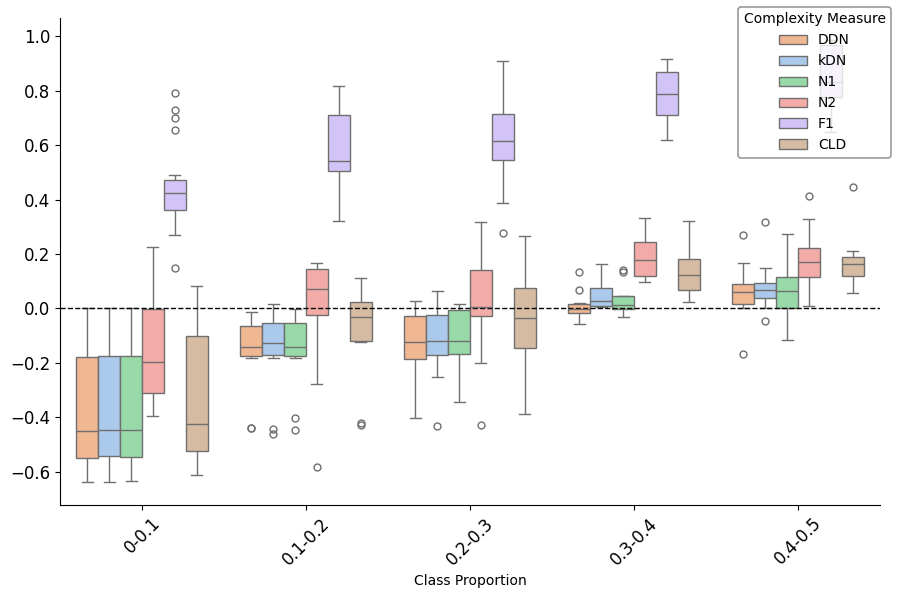

--- Plotting for Performance Metric: gps_score ---


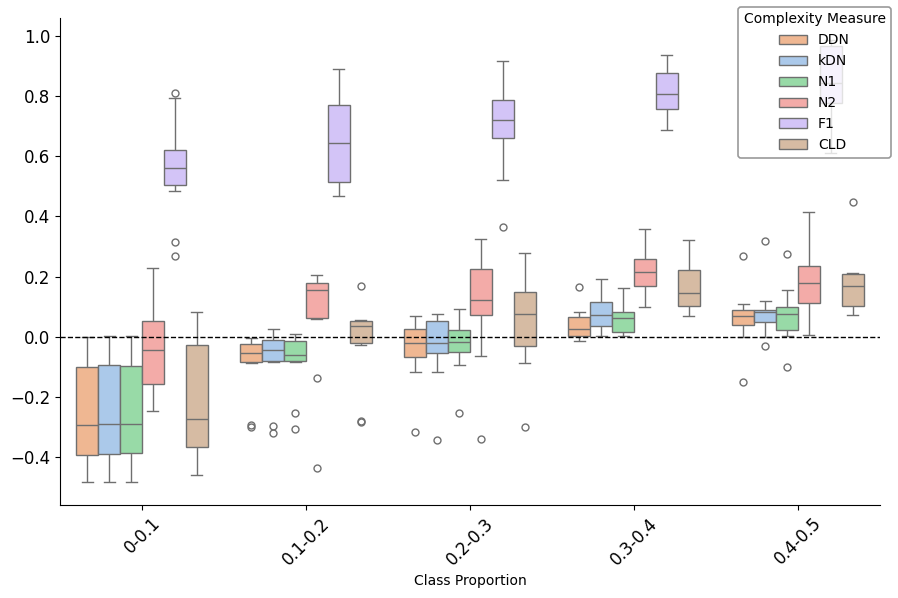

--- Plotting for Performance Metric: scaled_mcc_score ---


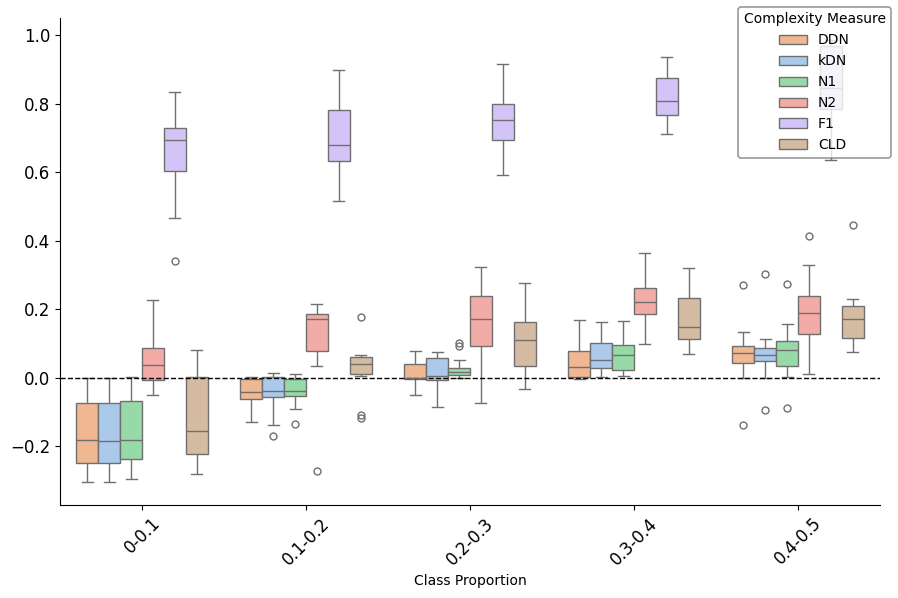

In [10]:
plot_sota_score_differences(df_merged, diff_col='diff_score_dataset', x_var='class_prop_category', y_title='')

In [11]:
calculate_grouped_statistics(df_merged[df_merged['metric_x'] == 'accuracy_score'], diff='diff_score_dataset', x_var='class_prop_category')

,class_prop_category,metric_y,median,mean,std,min,max,count
0,0-0.1,CLD,3.533943e-02,0.047906,0.031589,0.013614,0.149287,20
1,0-0.1,DDN,5.551115e-17,0.003063,0.013200,-0.019024,0.046812,20
2,0-0.1,F1,9.137985e-01,0.830822,0.169516,0.382671,0.969957,20
3,0-0.1,N1,8.556840e-03,0.008592,0.013198,-0.013374,0.048915,20
4,0-0.1,N2,2.335759e-01,0.218943,0.061830,0.078019,0.305658,20
5,0-0.1,kDN,4.160300e-03,0.004907,0.012563,-0.019024,0.046812,20
6,0.1-0.2,CLD,1.041761e-01,0.104765,0.048652,0.046031,0.214855,10
7,0.1-0.2,DDN,1.610940e-02,0.032911,0.035339,-0.003999,0.094444,10
8,0.1-0.2,F1,8.256164e-01,0.775086,0.143817,0.523721,0.961312,10
9,0.1-0.2,N1,2.196532e-02,0.039534,0.034503,0.007092,0.107794,10


In [12]:
calculate_grouped_statistics(df_merged[df_merged['metric_x'] == 'f1_score'], diff='diff_score_minority_class_complexity', x_var='class_prop_category')

,class_prop_category,metric_y,median,mean,std,min,max,count
0,0-0.1,CLD,0.433035,0.447999,0.136359,0.248774,0.709306,20
1,0-0.1,DDN,-0.083692,-0.089064,0.171930,-0.388638,0.145113,20
2,0-0.1,F1,0.515572,0.568124,0.190462,0.331901,0.948529,20
3,0-0.1,N1,0.015881,-0.016129,0.114894,-0.253446,0.171059,20
4,0-0.1,N2,-0.044997,-0.015073,0.225781,-0.357014,0.335552,20
5,0-0.1,kDN,0.073176,0.034870,0.182158,-0.365681,0.284211,20
6,0.1-0.2,CLD,0.281683,0.343246,0.227340,0.053986,0.661276,10
7,0.1-0.2,DDN,0.044633,0.065205,0.071037,-0.019960,0.200952,10
8,0.1-0.2,F1,0.669524,0.655101,0.196291,0.321096,0.900822,10
9,0.1-0.2,N1,0.063507,0.072055,0.056718,-0.011179,0.193810,10


In [13]:
calculate_grouped_statistics(df_merged[df_merged['metric_x'] == 'gps_score'], diff='diff_score_minority_class_complexity', x_var='class_prop_category')

,class_prop_category,metric_y,median,mean,std,min,max,count
0,0-0.1,CLD,0.553597,0.562198,0.117667,3.156088e-01,0.803840,20
1,0-0.1,DDN,0.016752,0.025135,0.149084,-2.366628e-01,0.243747,20
2,0-0.1,F1,0.667089,0.682323,0.144048,4.872032e-01,0.948529,20
3,0-0.1,N1,0.109764,0.098070,0.107346,-1.025903e-01,0.265593,20
4,0-0.1,N2,0.092069,0.099126,0.184006,-2.061582e-01,0.335552,20
5,0-0.1,kDN,0.158832,0.149069,0.173176,-2.137062e-01,0.382212,20
6,0.1-0.2,CLD,0.364853,0.418390,0.227661,1.496788e-01,0.740316,10
7,0.1-0.2,DDN,0.152900,0.140349,0.100624,1.108073e-02,0.297534,10
8,0.1-0.2,F1,0.768869,0.730245,0.171115,4.675318e-01,0.936750,10
9,0.1-0.2,N1,0.126042,0.147198,0.077967,4.441406e-02,0.290391,10


In [14]:
calculate_grouped_statistics(df_merged[df_merged['metric_x'] == 'scaled_mcc_score'], diff='diff_score_minority_class_complexity', x_var='class_prop_category')

,class_prop_category,metric_y,median,mean,std,min,max,count
0,0-0.1,CLD,0.677872,0.657426,0.102588,0.333149,0.822959,20
1,0-0.1,DDN,0.104422,0.120363,0.128896,-0.038468,0.398407,20
2,0-0.1,F1,0.754553,0.777551,0.078998,0.665245,0.948529,20
3,0-0.1,N1,0.174780,0.193298,0.110832,-0.004157,0.418495,20
4,0-0.1,N2,0.206180,0.194354,0.125772,-0.011768,0.341996,20
5,0-0.1,kDN,0.144972,0.164475,0.148365,-0.046259,0.496926,20
6,0.1-0.2,CLD,0.453491,0.462962,0.217502,0.150583,0.751903,10
7,0.1-0.2,DDN,0.172676,0.184921,0.148558,0.012127,0.452507,10
8,0.1-0.2,F1,0.804814,0.774817,0.128261,0.629270,0.944143,10
9,0.1-0.2,N1,0.165880,0.191770,0.116774,0.045460,0.376174,10


[DDN] Best parameters: {'regressor__max_depth': 9, 'select__k': 'all'}
[DDN] Best validation score (neg MSE): -0.010677852990055919
[DDN] r2 score: 0.7785607378029521
[kDN] Best parameters: {'regressor__max_depth': 6, 'select__k': 'all'}
[kDN] Best validation score (neg MSE): -0.011076107294082168
[kDN] r2 score: 0.439515059959127
[N1] Best parameters: {'regressor__max_depth': None, 'select__k': 'all'}
[N1] Best validation score (neg MSE): -0.010368396169928937
[N1] r2 score: 0.6951308865069377
[N2] Best parameters: {'regressor__max_depth': 3, 'select__k': 2}
[N2] Best validation score (neg MSE): -0.024409912477198287
[N2] r2 score: 0.24464865305023287
[F1] Best parameters: {'regressor__max_depth': 3, 'select__k': 'all'}
[F1] Best validation score (neg MSE): -0.020534480074581446
[F1] r2 score: 0.28388297337994994
[CLD] Best parameters: {'regressor__max_depth': 3, 'select__k': 'all'}
[CLD] Best validation score (neg MSE): -0.01889356605020818
[CLD] r2 score: 0.3350200625949751


<Figure size 600x600 with 0 Axes>

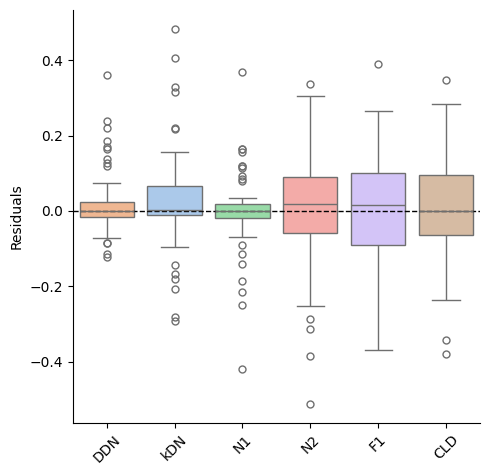

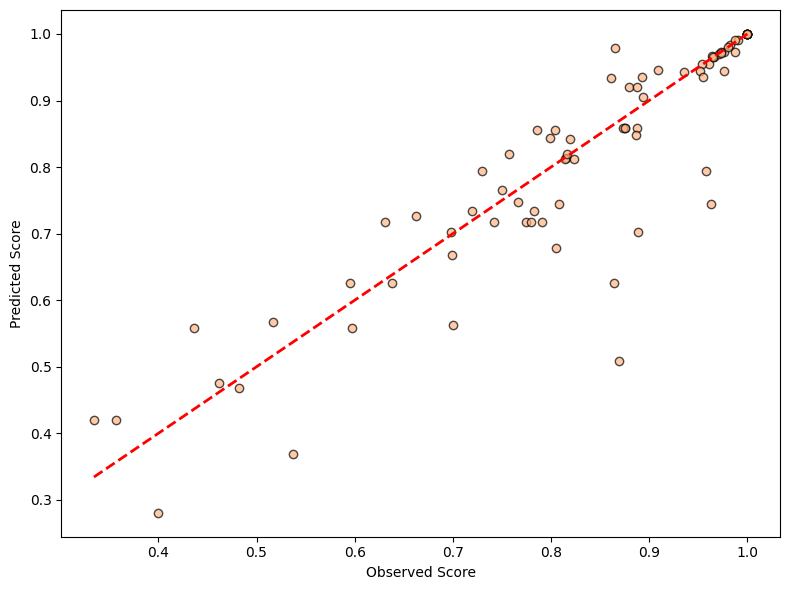

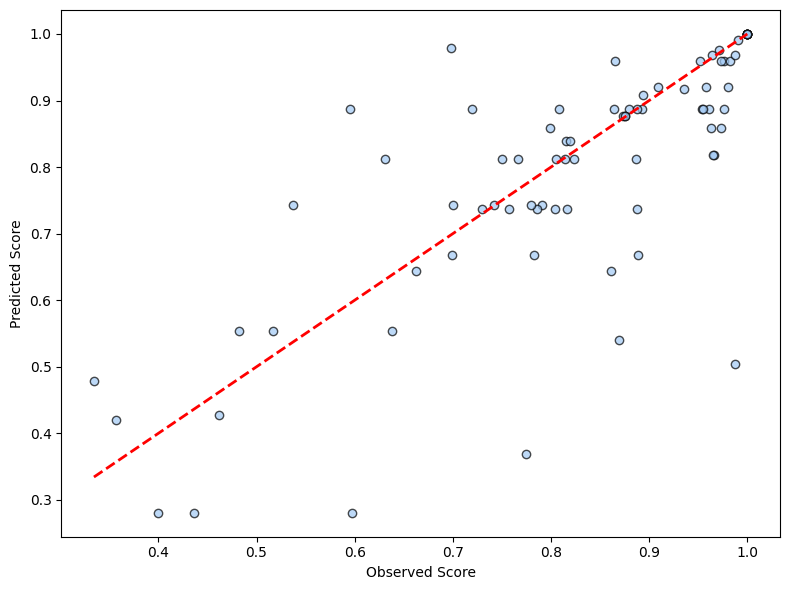

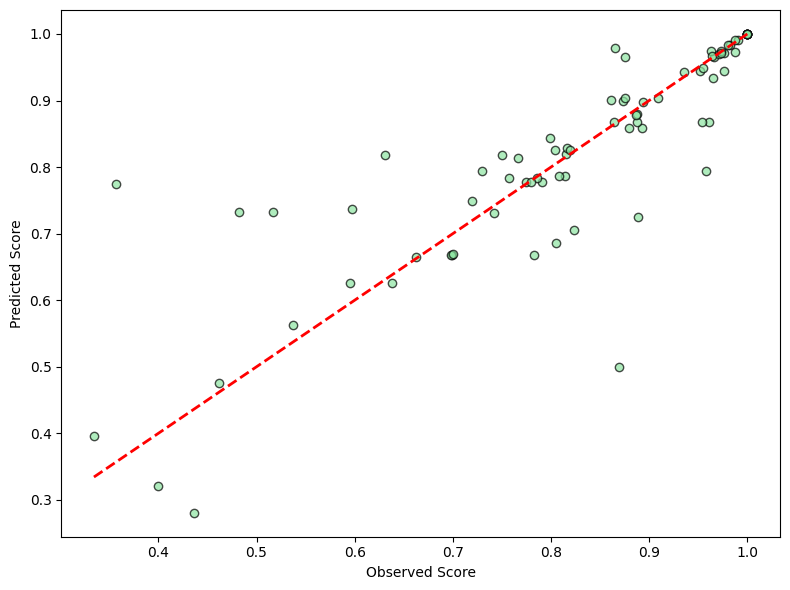

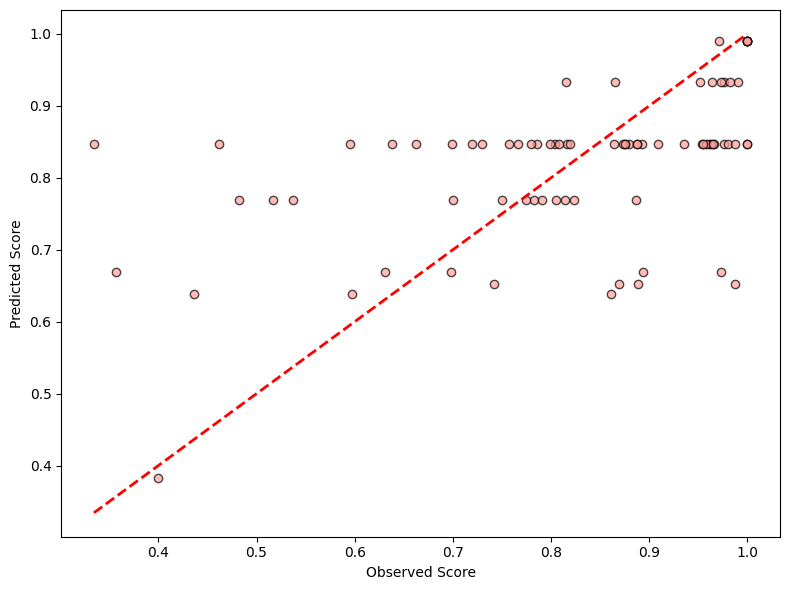

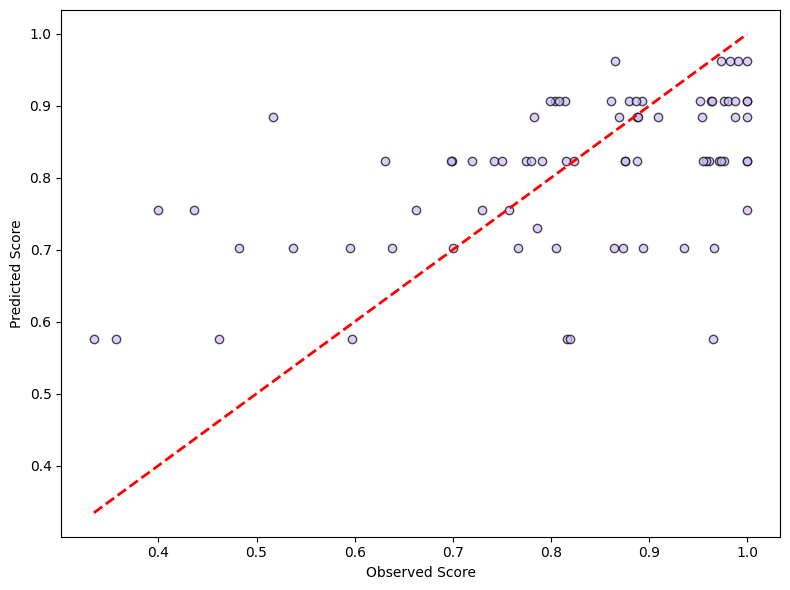

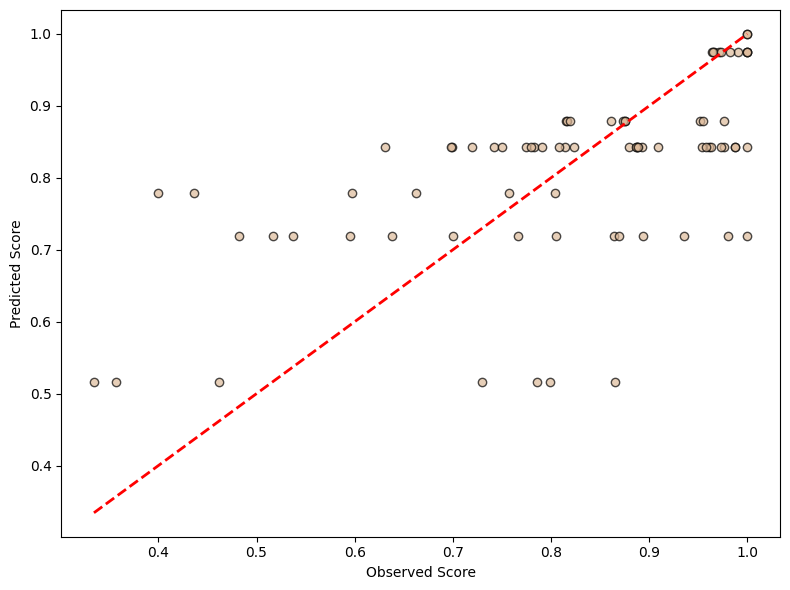

Summary statistics for each measure:
          count  mean   std   min   10%   20%   30%   40%   50%   60%   70%  \
metric_y                                                                      
CLD        78.0  0.01  0.14 -0.38 -0.17 -0.09 -0.06 -0.01 -0.00  0.03  0.06   
DDN        78.0  0.01  0.08 -0.12 -0.06 -0.04 -0.01 -0.00  0.00  0.00  0.02   
F1         78.0  0.01  0.14 -0.37 -0.14 -0.10 -0.05 -0.01  0.01  0.05  0.07   
N1         78.0 -0.00  0.09 -0.42 -0.07 -0.03 -0.01 -0.00 -0.00  0.00  0.01   
N2         78.0  0.00  0.15 -0.51 -0.20 -0.08 -0.04  0.01  0.02  0.04  0.05   
kDN        78.0  0.03  0.12 -0.29 -0.07 -0.02 -0.01 -0.00  0.00  0.02  0.05   

           80%   90%   max  
metric_y                    
CLD       0.12  0.16  0.35  
DDN       0.04  0.12  0.36  
F1        0.13  0.18  0.39  
N1        0.03  0.09  0.37  
N2        0.11  0.14  0.34  
kDN       0.08  0.15  0.48  


In [15]:
# Filter the data for ddn and kdn groups
datos_ddn = df_merged[df_merged['metric_y'] == 'DDN'].copy()
datos_kdn = df_merged[df_merged['metric_y'] == 'kDN'].copy()
datos_n1 = df_merged[df_merged['metric_y'] == 'N1'].copy()
datos_n2 = df_merged[df_merged['metric_y'] == 'N2'].copy()
datos_f1 = df_merged[df_merged['metric_y'] == 'F1'].copy()
datos_cld = df_merged[df_merged['metric_y'] == 'CLD'].copy()

# Train and evaluate the model for each group
model_ddn, X_test_ddn, y_test_ddn, y_pred_ddn = train_and_evaluate_model(datos_ddn, 'DDN')
model_kdn, X_test_kdn, y_test_kdn, y_pred_kdn = train_and_evaluate_model(datos_kdn, 'kDN')
model_n1, X_test_n1, y_test_n1, y_pred_n1 = train_and_evaluate_model(datos_n1, 'N1')
model_n2, X_test_n2, y_test_n2, y_pred_n2 = train_and_evaluate_model(datos_n2, 'N2')
model_f1, X_test_f1, y_test_f1, y_pred_f1 = train_and_evaluate_model(datos_f1, 'F1')
model_cld, X_test_cld, y_test_cld, y_pred_cld = train_and_evaluate_model(datos_cld, 'CLD')


# Compute the residuals for each group
resid_ddn = compute_residuals(y_test_ddn, y_pred_ddn)
resid_kdn = compute_residuals(y_test_kdn, y_pred_kdn)
resid_n1 = compute_residuals(y_test_n1, y_pred_n1)
resid_n2 = compute_residuals(y_test_n2, y_pred_n2)
resid_f1 = compute_residuals(y_test_f1, y_pred_f1)
resid_cld = compute_residuals(y_test_cld, y_pred_cld)

# Create a DataFrame with the residuals and the group label
df_resid_ddn = pd.DataFrame({"resid": resid_ddn, "metric_y": "DDN"})
df_resid_kdn = pd.DataFrame({"resid": resid_kdn, "metric_y": "kDN"})
df_resid_n1 = pd.DataFrame({"resid": resid_n1, "metric_y": "N1"})
df_resid_n2 = pd.DataFrame({"resid": resid_n2, "metric_y": "N2"})
df_resid_f1 = pd.DataFrame({"resid": resid_f1, "metric_y": "F1"})
df_resid_cld = pd.DataFrame({"resid": resid_cld, "metric_y": "CLD"})
df_resid = pd.concat([df_resid_ddn, df_resid_kdn, df_resid_n1, df_resid_n2, df_resid_f1, df_resid_cld], ignore_index=True)

# Plot residuals comparison
plot_sota_residuals_comparison(df_resid)

# Plot Observed vs Predicted for each group
plot_sota_observed_vs_predicted(y_test_ddn, y_pred_ddn, "DDN")
plot_sota_observed_vs_predicted(y_test_kdn, y_pred_kdn, "kDN")
plot_sota_observed_vs_predicted(y_test_n1, y_pred_n1, "N1")
plot_sota_observed_vs_predicted(y_test_n2, y_pred_n2, "N2")
plot_sota_observed_vs_predicted(y_test_f1, y_pred_f1, "F1")
plot_sota_observed_vs_predicted(y_test_cld, y_pred_cld, "CLD")

# Print summary statistics of the residuals
print_summary_statistics(df_resid)

